<a href="https://colab.research.google.com/github/dyjdlopez/ece-data-workshop-2022/blob/main/Week2-3/ece_special_sda04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensor Data Analytics IV: Predictive Analytics
$\text{Ⓒ D.J.D. Lopez 2022}$

In the previous activity, we learned about descriptive analytics. Specifically, we used visual and statistical analytics to explore our data and make sense of our data. 

In this activity, we will explore predictive analytics. It is another type analytics which uses mathematical modeling tools to generate predictions.

## 1. Data Preparation
Data preparation refers to the processes that makes the dataset ready for exploration, modelling, and evaluation.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
weather_df = pd.read_csv('data/sf_weather_data.csv')
weather_df

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,weather_desc
0,01/10/2012 13:00,289.480000,88.0,1009.0,2.0,150.0,light rain
1,01/10/2012 14:00,289.474993,87.0,1009.0,2.0,147.0,sky is clear
2,01/10/2012 15:00,289.460618,86.0,1009.0,2.0,141.0,sky is clear
3,01/10/2012 16:00,289.446243,85.0,1009.0,2.0,135.0,sky is clear
4,01/10/2012 17:00,289.431869,84.0,1009.0,2.0,129.0,sky is clear
...,...,...,...,...,...,...,...
45247,29/11/2017 20:00,NaN,NaN,NaN,NaN,NaN,NaN
45248,29/11/2017 21:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,29/11/2017 22:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,29/11/2017 23:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather_df.dtypes

datetime           object
temperature       float64
humidity          float64
pressure          float64
wind_speed        float64
wind_direction    float64
weather_desc       object
dtype: object

In [ ]:
## Split date and time 
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%d/%m/%Y %H:%M')
date_part = weather_df['datetime'].dt.date
time_part = weather_df['datetime'].dt.time

In [ ]:
weather_df.insert(1,'date', date_part)
weather_df.insert(2,'time', time_part)
weather_df = weather_df.set_index('datetime', drop=True)
weather_df

,date,time,temperature,humidity,pressure,wind_speed,wind_direction,weather_desc
datetime,,,,,,,,
2012-10-01 13:00:00,2012-10-01,13:00:00,289.480000,88.0,1009.0,2.0,150.0,light rain
2012-10-01 14:00:00,2012-10-01,14:00:00,289.474993,87.0,1009.0,2.0,147.0,sky is clear
2012-10-01 15:00:00,2012-10-01,15:00:00,289.460618,86.0,1009.0,2.0,141.0,sky is clear
2012-10-01 16:00:00,2012-10-01,16:00:00,289.446243,85.0,1009.0,2.0,135.0,sky is clear
2012-10-01 17:00:00,2012-10-01,17:00:00,289.431869,84.0,1009.0,2.0,129.0,sky is clear
...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,2017-11-29,20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,2017-11-29,21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,2017-11-29,22:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather_df.dtypes

date               object
time               object
temperature       float64
humidity          float64
pressure          float64
wind_speed        float64
wind_direction    float64
weather_desc       object
dtype: object

In [ ]:
print(f'No. of Entries in the Original Weather DataFrame: {len(weather_df)}')

No. of Entries in the Original Weather DataFrame: 45252


In [ ]:
weather_df = weather_df.dropna()
print(f'No. of Entries in the Weather DataFrame with Dropped Contents: {len(weather_df)}')

No. of Entries in the Weather DataFrame with Dropped Contents: 44304


In [ ]:
weather_df.head()

,date,time,temperature,humidity,pressure,wind_speed,wind_direction,weather_desc
datetime,,,,,,,,
2012-10-01 13:00:00,2012-10-01,13:00:00,289.480000,88.0,1009.0,2.0,150.0,light rain
2012-10-01 14:00:00,2012-10-01,14:00:00,289.474993,87.0,1009.0,2.0,147.0,sky is clear
2012-10-01 15:00:00,2012-10-01,15:00:00,289.460618,86.0,1009.0,2.0,141.0,sky is clear
2012-10-01 16:00:00,2012-10-01,16:00:00,289.446243,85.0,1009.0,2.0,135.0,sky is clear
2012-10-01 17:00:00,2012-10-01,17:00:00,289.431869,84.0,1009.0,2.0,129.0,sky is clear


## 2. Exploratory Data Analysis
This process aims to explore the data. In this process, we want to understand the data more to be able to have insights and assumptions that can be used for feature selection in the next stage.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

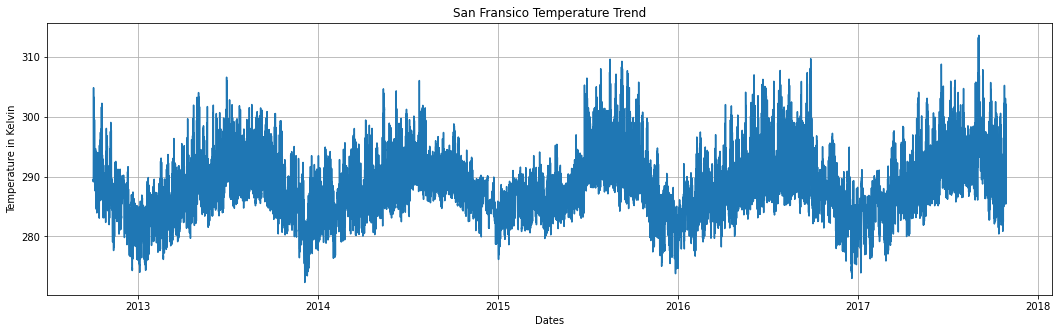

In [ ]:
# Plot the Temperature Trend 

plt.figure(figsize=(18,5))
plt.plot(weather_df.index, weather_df.temperature)

plt.title('San Fransico Temperature Trend')
plt.ylabel('Temperature in Kelvin')
plt.xlabel('Dates')
plt.grid()
plt.show()

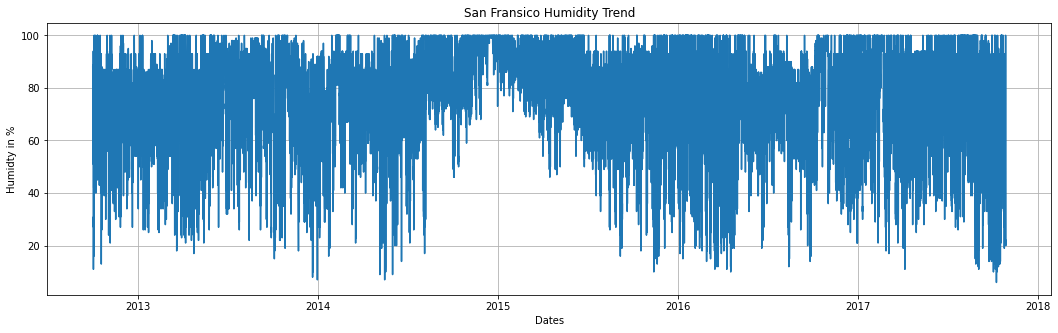

In [ ]:
# Plot the Humidity Trend 

plt.figure(figsize=(18,5))
plt.plot(weather_df.index, weather_df.humidity)

plt.title('San Fransico Humidity Trend')
plt.ylabel('Humidty in %')
plt.xlabel('Dates')
plt.grid()
plt.show()

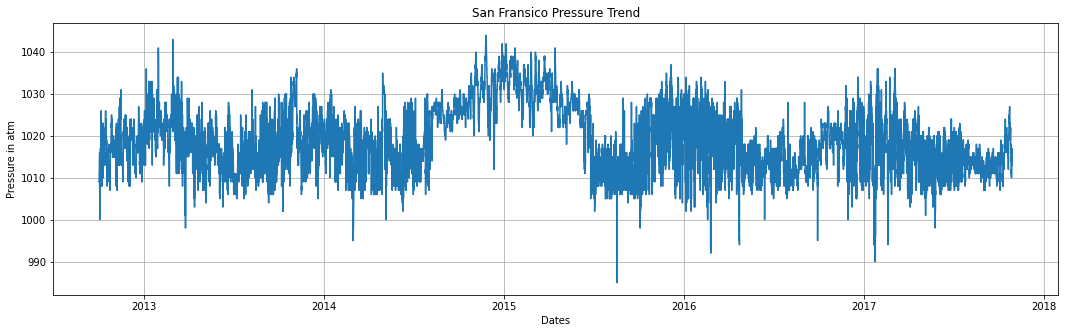

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(weather_df.index, weather_df.pressure)

plt.title('San Fransico Pressure Trend')
plt.ylabel('Pressure in atm')
plt.xlabel('Dates')
plt.grid()
plt.show()

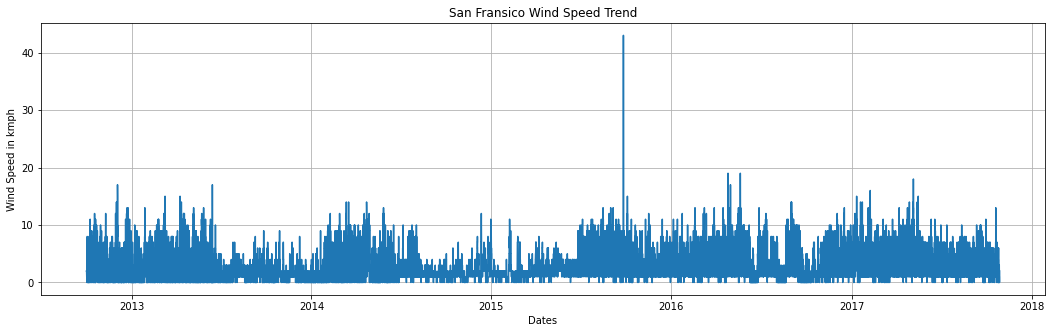

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(weather_df.index, weather_df.wind_speed)

plt.title('San Fransico Wind Speed Trend')
plt.ylabel('Wind Speed in kmph')
plt.xlabel('Dates')
plt.grid()
plt.show()

In [ ]:
corr_data = weather_df[['temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'weather_desc']]

In [ ]:
set(corr_data['weather_desc'])

{'broken clouds',
 'drizzle',
 'few clouds',
 'fog',
 'haze',
 'heavy intensity drizzle',
 'heavy intensity rain',
 'heavy snow',
 'light intensity drizzle',
 'light intensity shower rain',
 'light rain',
 'light snow',
 'mist',
 'moderate rain',
 'overcast clouds',
 'proximity shower rain',
 'proximity thunderstorm',
 'proximity thunderstorm with rain',
 'scattered clouds',
 'shower rain',
 'sky is clear',
 'smoke',
 'squalls',
 'thunderstorm',
 'thunderstorm with heavy rain',
 'thunderstorm with light rain',
 'thunderstorm with rain',
 'very heavy rain'}

In [ ]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
label_enc.fit(corr_data['weather_desc'])
corr_data['weather_desc'] = label_enc.transform(corr_data['weather_desc'])
corr_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,temperature,humidity,pressure,wind_speed,wind_direction,weather_desc
datetime,,,,,,
2012-10-01 13:00:00,289.480000,88.0,1009.0,2.0,150.0,10
2012-10-01 14:00:00,289.474993,87.0,1009.0,2.0,147.0,20
2012-10-01 15:00:00,289.460618,86.0,1009.0,2.0,141.0,20
2012-10-01 16:00:00,289.446243,85.0,1009.0,2.0,135.0,20
2012-10-01 17:00:00,289.431869,84.0,1009.0,2.0,129.0,20


Now that we have seen the trend of our data and encoded the weather descriptions into numerical data, we can now use pairplot to display the a pairplot to represent the pair-wise relationship within our data. 

Our data points are represented by the blue data points. The red lines in the pairplot are the regression line in each pair-wise relationship in the plot. This kind of plot easily visualizes the relation in our data.

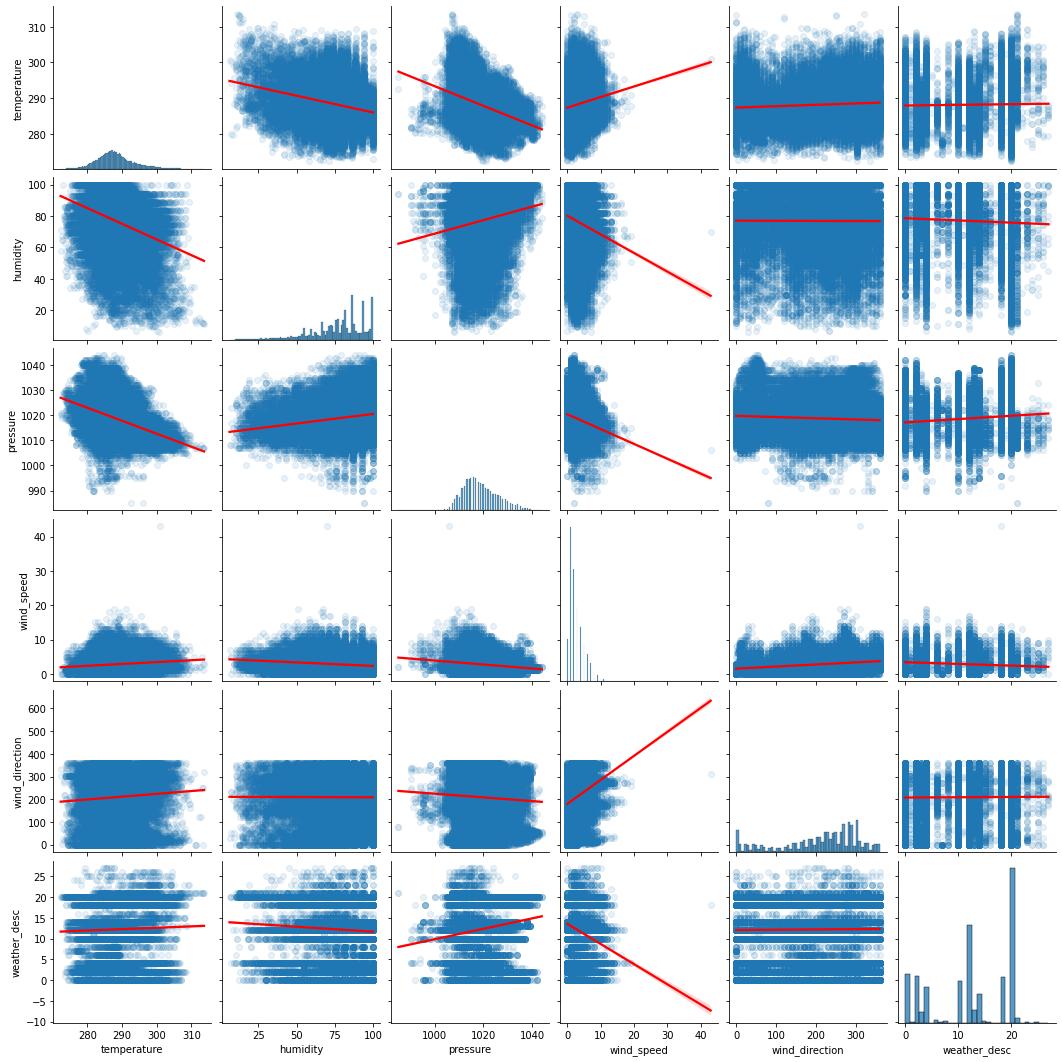

In [ ]:
sns.pairplot(corr_data, 
             kind='reg', 
             plot_kws={
                 'line_kws':{'color':'red'},
                 'scatter_kws': {'alpha': 0.1}
                 }
             )

## 3. Feature Selection
This process refers to identifying a subset of the whole data and selecting the relevant features to use in model construction. Using this process may improve the model performance.

We can use the heatmap visualization to plot the correlation values in the whole data. It is a data visualization technique technique that shows magnitude of a phenomenon as color in two dimensions (i.e. Red and Blue). 

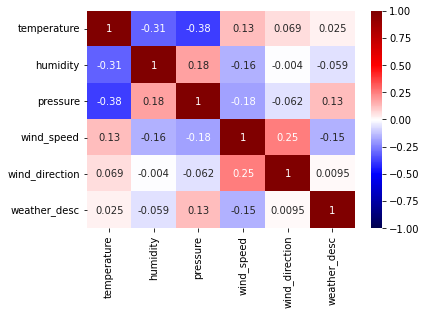

In [ ]:
correlation_table = corr_data.corr()
sns.heatmap(correlation_table, annot=True, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [ ]:
# Select Features that have high correlation (Either negative or Positive)

features = corr_data[['humidity', 'pressure', 'temperature']]

In [ ]:
X = features[['humidity', 'pressure']]
y = features['temperature']

## 4. Model Engineering
We now have loaded, explored, and selected the best features of the data in preparation for model engineering. Model engineering refers to the process of creating the machine learning models, which in our case we want to predict the temperature given the humidity and pressure as inputs.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

### 4.1 Dataset Splicing
![image](https://www.researchgate.net/profile/Brian_Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In preparation for the model training, we need to split data into training and testing set. We will use the training set to fit/*train* the set to the model. On the other hand we will use the testing set to evaluate the performance of the trained model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

### 4.2 Ordinary Least-Squares Regression
It is a form of statistical regression used in predicting unknown values from an existing set of data. It relies on minimizing the sum of squared residuals between the actual and predicted values. Residuals are also known as errors. We can calculate the minimum sum of squares residuals using:
$$ \min \sum_i^N(y_i – \hat{y}_i)^2 $$

whereas: 
*   $ y_i $ is the *i*th  actual target 
*   $ \hat{y}_i $ is the *i*th  prediction
*   $ N $ is the total number of samples
*   $ i $ is the individual index of sample $N$




In [ ]:
# Initialize an instance of our Ordinary Least-Squares (OLS) Regression
ols_model = LinearRegression()

# Fit the data into the OLS model
ols_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print Correlaltion Coefficient and Intercept

print(f'Correlation Coefficient of the Model: {ols_model.coef_}')
print(f'Intercept of the Model: {ols_model.intercept_}')

Correlation Coefficient of the Model: [-0.07489828 -0.24181317]
Intercept of the Model: 540.2931368059974


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


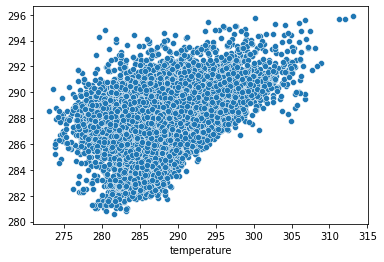

In [ ]:
# Plot Predictions

ols_predictions = ols_model.predict(X_test)
sns.scatterplot(y_test, ols_predictions)
plt.show()

In [ ]:
# Print Model Scores

print(f'Training Set Score: {ols_model.score(X_train, y_train)}')
print(f'Testing Set Score: {ols_model.score(X_test, y_test)}')

Training Set Score: 0.1998823721063432
Testing Set Score: 0.20480100357418063


### 4.3 Least Absolute Shrinkage and Selection Operator (Lasso) Regression
The advantage of lasso regression compared to the least squares regression lies in the bias-variance tradeoff. The idea of lasso regression is to introduce a little bias in order to reduce variance substantially which will the lead to a lower overall Mean Squared Error (MSE).
$$ \min \sum_i^N(y_i – \hat{y}_i)^2 + \lambda\sum_j^p |\beta_j| $$

whereas: 
*   $ y_i $ is the *i*th sample of the ground truth  
*   $ \hat{y}_i $ is the *i*th  prediction
*   $ N $ is the total number of samples
*   $ i $ is the individual index of sample $N$
*   $ \lambda $ is the penalty coefficient
*   $ p  $ is the total number of coefficients
*   $ j $ is the individual index of coefficient $p$
*   $ \beta_j $ is the *i*th sample of the coefficients


This regression type uses an L1 regularization technique. Lasso shrinks the less important feature's coefficient to zero (removing it altoghether) which is not possible in the OLS Linear Regression. 

In [ ]:
# Initialize an instance of our Ordinary Least-Squares Regression
lasso_model = Lasso()

# Fit the data into the Lasso model
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
# Print Correlaltion Coefficient and Intercept

print(f'Correlation Coefficient of the Model: {lasso_model.coef_}')
print(f'Intercept of the Model: {lasso_model.intercept_}')

Correlation Coefficient of the Model: [-0.07294213 -0.22411541]
Intercept of the Model: 522.1118189926208


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


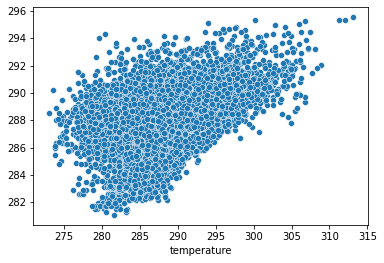

In [ ]:
# Plot Predictions
lasso_predictions = lasso_model.predict(X_test)
sns.scatterplot(y_test, lasso_predictions)
plt.show()

In [ ]:
# Print Model Scores

print(f'Training Set Score: {lasso_model.score(X_train, y_train)}')
print(f'Testing Set Score: {lasso_model.score(X_test, y_test)}')

Training Set Score: 0.199191928178035
Testing Set Score: 0.20399189675134366


### 4.4 Ridge Regression
This type of regression is an adaptation of the linear regression algorithm. By changing its cost function, it can enhance the regular linear regression to yield less overfit models. Below is the normal equation for the ridge regression:

$$ \min \sum_i^N(y_i – \hat{y}_i)^2 + \lambda\sum_j^p \beta_j^2 $$

whereas: 
*   $ y_i $ is the *i*th sample of the ground truth  
*   $ \hat{y}_i $ is the *i*th  prediction
*   $ N $ is the total number of samples
*   $ i $ is the individual index of sample $N$
*   $ \lambda $ is the penalty coefficient
*   $ p  $ is the total number of coefficients
*   $ j $ is the individual index of coefficient $p$
*   $ \beta_j $ is the *i*th sample of the coefficients
<br>
<br>
The L2 regularization adds the *squared magnitude* of coefficient as penalty term to the loss function. As opposed to the L1 regularization whichs attempts to estimate the median of the data, L2 regularization estimates the mean of the data.

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Print Correlaltion Coefficient and Intercept

print(f'Correlation Coefficient of the Model: {ridge_model.coef_}')
print(f'Intercept of the Model: {ridge_model.intercept_}')

Correlation Coefficient of the Model: [-0.07489828 -0.24181304]
Intercept of the Model: 540.2930070530132


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


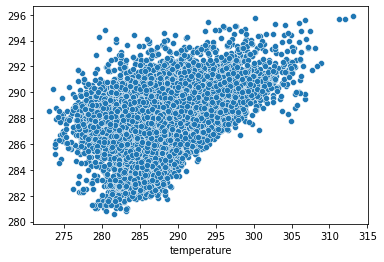

In [ ]:
#Plot the Predictions

ridge_predictions = ridge_model.predict(X_test)
sns.scatterplot(y_test, ridge_predictions)
plt.show()

In [ ]:
# Print Model Scores

print(f'Training Set Score: {ridge_model.score(X_train, y_train)}')
print(f'Testing Set Score: {ridge_model.score(X_test, y_test)}')

Training Set Score: 0.19988237210631332
Testing Set Score: 0.2048010035850767


### 4.5 ElasticNet
It is a combination of two regularized variants of linear regression (ridge and lasso). Ridge Utilizes L2 penalty while Lasso uses L1 penalty. Its combination means that the ElasticNet uses both L1 and L2 penalties. 

$$ \min \sum_i^N(y_i – \hat{y}_i)^2 + \lambda\sum_j^p \beta_j^2 + \lambda\sum_j^p |\beta_j| $$

whereas: 
*   $ y_i $ is the *i*th sample of the ground truth  
*   $ \hat{y}_i $ is the *i*th  prediction
*   $ N $ is the total number of samples
*   $ i $ is the individual index of sample $N$
*   $ \lambda $ is the penalty coefficient
*   $ p  $ is the total number of coefficients
*   $ j $ is the individual index of coefficient $p$
*   $ \beta_j $ is the *i*th sample of the coefficients

In [ ]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [ ]:
# Print Correlaltion Coefficient and Intercept

print(f'Correlation Coefficient of the Model: {elastic_model.coef_}')
print(f'Intercept of the Model: {elastic_model.intercept_}')

Correlation Coefficient of the Model: [-0.07396158 -0.23080834]
Intercept of the Model: 529.0091041123968


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


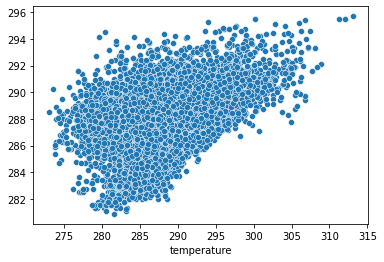

In [ ]:
elastic_predictions = elastic_model.predict(X_test)
sns.scatterplot(y_test, elastic_predictions)
plt.show()

In [ ]:
# Print Model Scores

print(f'Training Set Score: {elastic_model.score(X_train, y_train)}')
print(f'Testing Set Score: {elastic_model.score(X_test, y_test)}')

Training Set Score: 0.19962678760372865
Testing Set Score: 0.20448651273596086


### 4.6 Regression Metrics

Like any machine learning models we must determine their level of acceptance through measurements. Let us learn how to determine the error and accuracy of the regression models.

#### **Measures of Error**
Error or losses are computed to determine the robustness of a model to certain dataset. There are several ways to compute the error some of them are:
* Sum of Squares Total
* Sum of Squares Regression
* Sum of Squares Error
* Mean Squared Error
* Mean Absolute Error
* Mean Abosulute Percentage Error

##### *Sum of Squares Total*
The Sum of Squares Total or SST is a measure of the variability of dataset it is computed by:
$$SST = \sum_{i=0}^n(y_i-\bar{y})^2 \\_\text{Eq.4.3.3}$$

In [ ]:
def SST(y):
  return np.sum(np.square(y-y.mean()))

##### *Sum of Squares Regression*
The Sum of Squares Regression or SSR is a measure of the variability of the model it is computed by:
$$SSR = \sum_{i=0}^n(\hat{y_i}-\bar{y})^2 \\_\text{Eq.4.3.4}$$

In [ ]:
def SSR(y,y_hat):
  return np.sum(np.square(y_hat-y.mean()))

##### *Sum of Squares Error*
The Sum of Squares Regression or SSE is a measure of the variability of the model with respect to the residuals or its deviation from the ground truths, it is computed by:
$$SSE = \sum_{i=0}^n(\hat{y_i}-y_i)^2 \\_\text{Eq.4.3.5}$$

In [ ]:
def SSE(y,y_hat):
  return np.sum(np.square(y_hat-y))

##### *Mean of Squared Error*
The Mean Squared Error or MSE the name suggests it is the mean of the squared errors or SSE. It is the average error of a model. It is computed as:
$$MSE = \frac{1}{n}\sum_{i=0}^n(\hat{y_i}-y_i)^2 \\_\text{Eq.4.3.6}$$

In [ ]:
def MSE(y,y_hat):
  return np.mean(np.square(y_hat-y))

##### *Mean of Absolute Error*
The Mean Absolute Error or MAE, is another error measurement between the model and the ground truths but uses the Manhattan distance instead of the Euclidean distance from SSE.
$$MAE = \frac{1}{n}\sum_{i=0}^n|\hat{y_i}-y_i| \\_\text{Eq.4.3.7}$$

In [ ]:
def MAE(y,y_hat):
  return np.mean(np.abs(y_hat-y))

##### *Mean of Absolute Percentage Error*
The Mean Absolute Percentage Error or MAPE, is another error measurement derived from MAE but this time the error normalized. It is computed as:
$$MAPE = \frac{100\%}{n}\sum_{i=0}^n|\frac{\hat{y_i}-y_i}{y_i}| \\_\text{Eq.4.3.8}$$

In [ ]:
def MAPE(y,y_hat):
  return 100*np.mean(np.abs((y_hat-y)/y))

##### *Root Mean Squared Error*
The Root Mean Squared Error or RMSE, is the root of the RMSE which brings it back to its actual unit. It is computed as:
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=0}^n(\hat{y_i}-y_i)^2} \\_\text{Eq.4.3.9}$$

#### Measures Accuracy
We measure the accuracy of the regression through its explainability. We measure it through the R-squared or the Adjusted R-squared.

##### *R-squared*
The R-squared is a statistical measurement also known as the coefficient of determination wherein it shows the explanatory power of the variables used in the model. It is computed by:

$$R^2 = 1 - \frac{SSE}{SST}\\_\text{Eq.4.3.10}$$


##### *Adjusted R-squared*
The Adjusted R-squared is another statistical measurement for detemrinign the explanatory power of a model. Unlike, R-squared it is adjusted accordingly to the total datapoints and the features involved in the computation. It is computed by:

$$Adj. R^2 = 1 - \frac{SSE}{SST}\cdot \frac{n-1}{n-k-1} = 1 - \frac{(1-R^2)(n-1)}{n-k-1}\\_\text{Eq.4.3.10}$$

Whereas $n$ is the total number of datapoints in the dataset and $k$ is the total number of features to be used in the regression.

# References:
[1] “Ordinary Least Squares,” DeepAI, May 17, 2019. [Online]. Available: https://deepai.org/machine-learning-glossary-and-terms/ordinary-least-squares. (Accessed: November 4, 2022) <br>

[2] Hutcheson, G. D. “Ordinary Least-Squares Regression.”  2011 [Online]. Available: https://www.research-training.net/addedfiles/READING/OLSchapter.pdf (Accessed: November 04, 2022) <br>

[3] Zach, “Introduction to Lasso Regression,” Statology, Nov. 12, 2020. [Online]. Available: https://www.statology.org/lasso-regression/ (Accessed: November 4, 2022) <br>

[4] Anuja Nagpal, “L1 and L2 Regularization Methods,” Medium, Oct. 13, 2017. [Online]. Available: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c (Accessed: November 04, 2022) <br>

[5] Wilson, J. “What is L1 and L2 penalty in logistic regression? – Technical-QA.com,” technical-qa.com. December 27, 2019. [Online]. Available: https://technical-qa.com/what-is-l1-and-l2-penalty-in-logistic-regression/ (Accessed Nov. 04, 2022). <br>

[6] Giba, B. “Ridge Regression Explained, Step by Step,” Machine Learning Compass, May 23, 2021. [Online]. Available: https://machinelearningcompass.com/machine_learning_models/ridge_regression/ (Accessed Nov. 04, 2022). <br>

[7]“Ridge Regression.” [Online]. Available: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf (Accessed Nov. 04, 2022). <br>
‌
[8] Giba, B. “Elastic Net Regression Explained, Step by Step,” Machine Learning Compass, Jun. 26, 2021. [Online]. Available: https://machinelearningcompass.com/machine_learning_models/elastic_net_regression/ (Accessed Nov. 04, 2022). <br>

[9] J. D. Tucker, J. R. Lewis, and A. Srivastava, “Elastic functional principal component regression,” Statistical Analysis and Data Mining: The ASA Data Science Journal, vol. 12, no. 2, pp. 101–115, Dec. 2018, doi: 10.1002/sam.11399.
‌
‌


‌
‌
‌

